In [2]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import matplotlib
import glob
import skimage.io as skio
from sklearn.model_selection import train_test_split
import xgboost as xgb
import os
from scipy import interpolate
from scipy.signal import medfilt
from scipy.signal import find_peaks
from scipy.ndimage import uniform_filter1d

matplotlib.rcParams['figure.figsize'] = [10, 10]

In [3]:
def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.

    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
        >>> # linear interpolation of NaNs
        >>> nans, x= nan_helper(y)
        >>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """

    return np.isnan(y), lambda z: z.nonzero()[0]

0


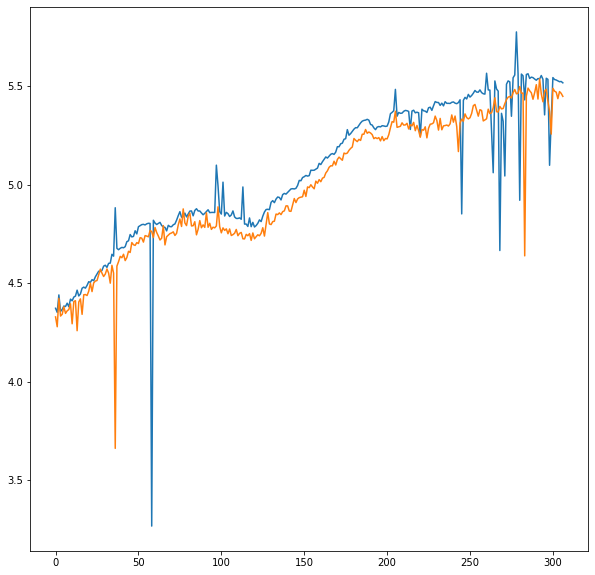

1


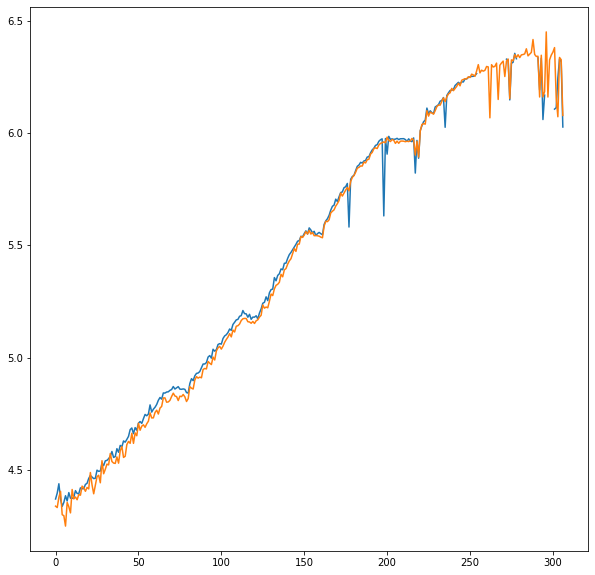

2


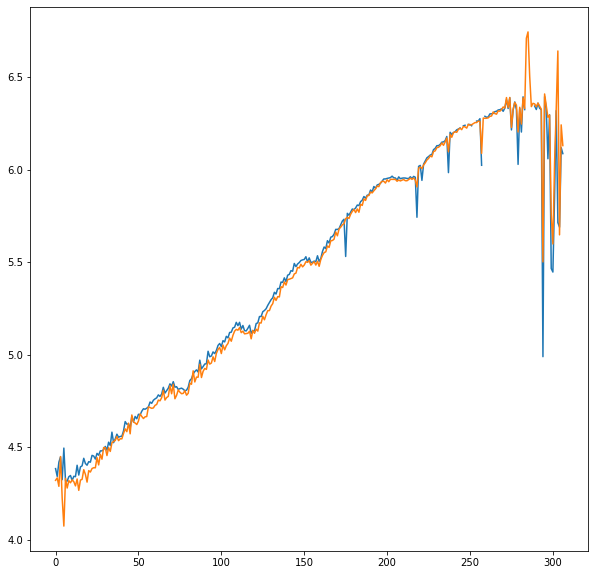

3


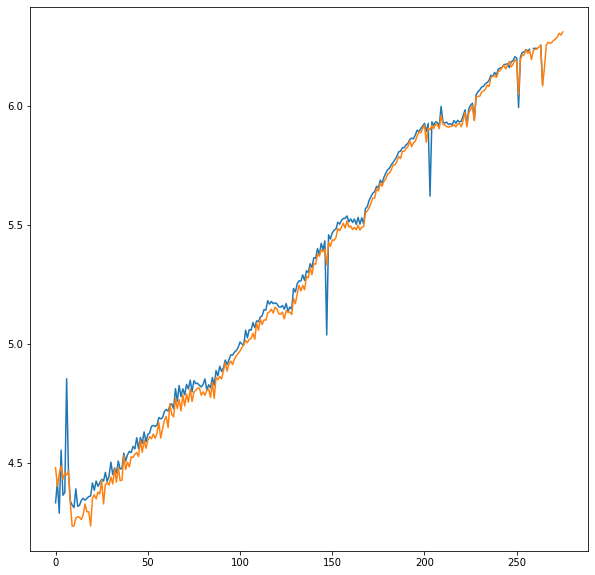

4


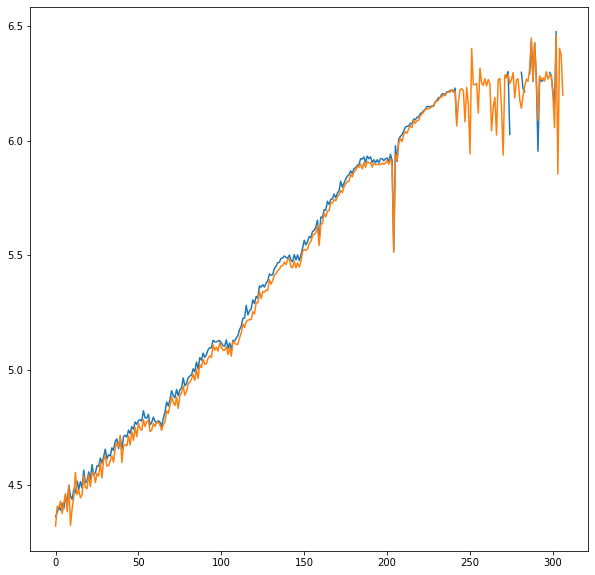

5


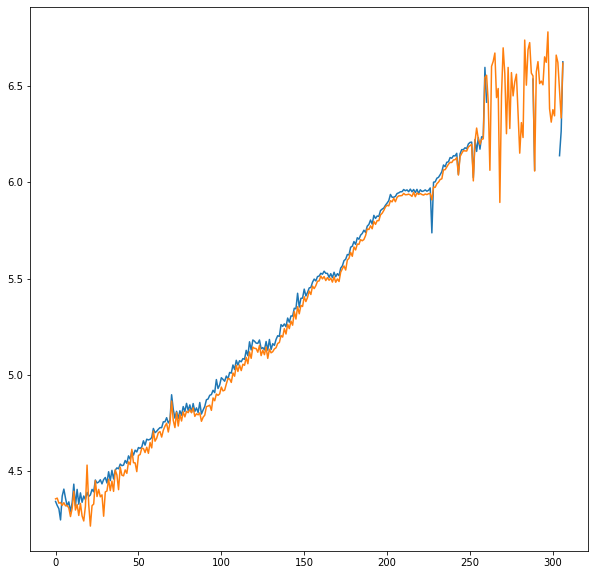

6


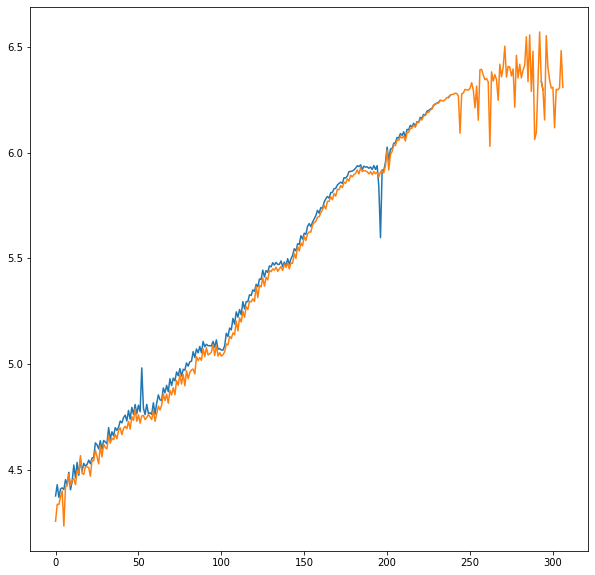

7


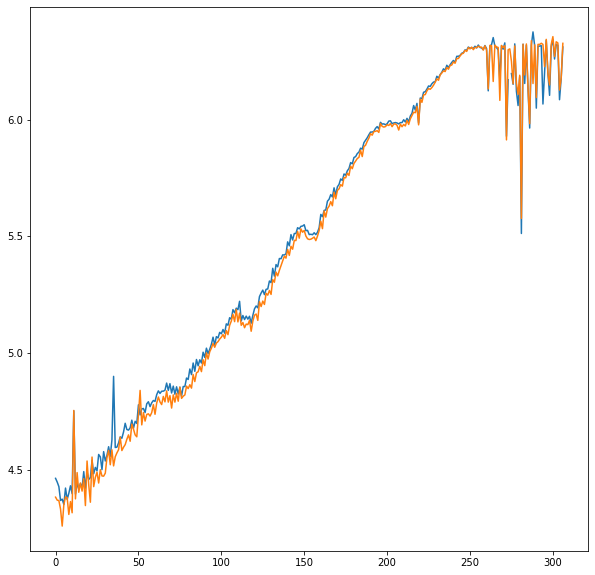

8


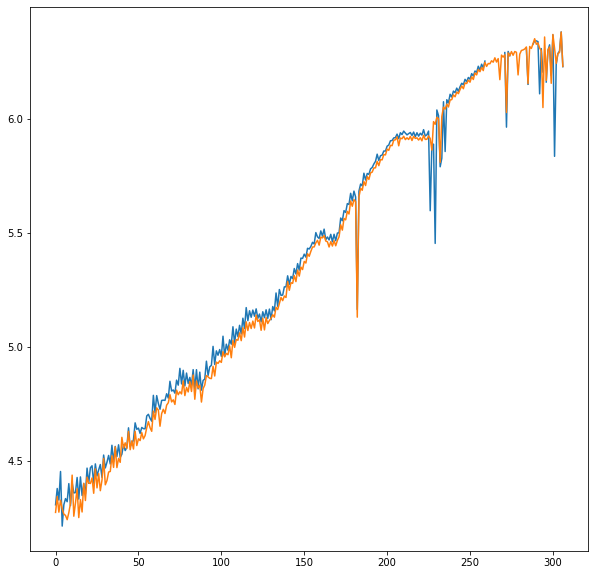

9


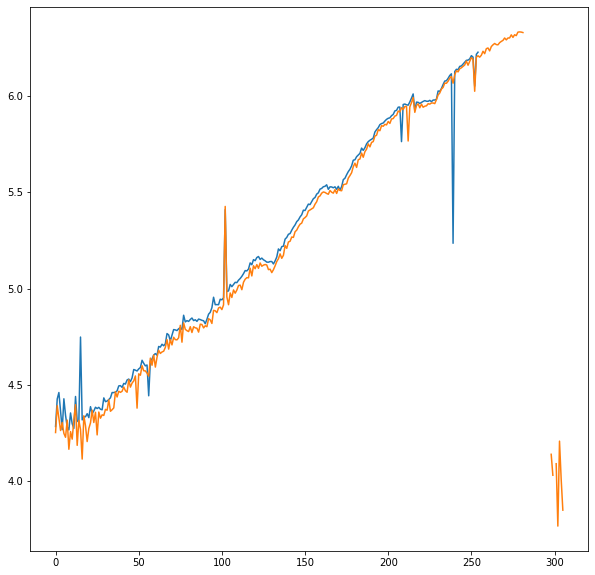

10


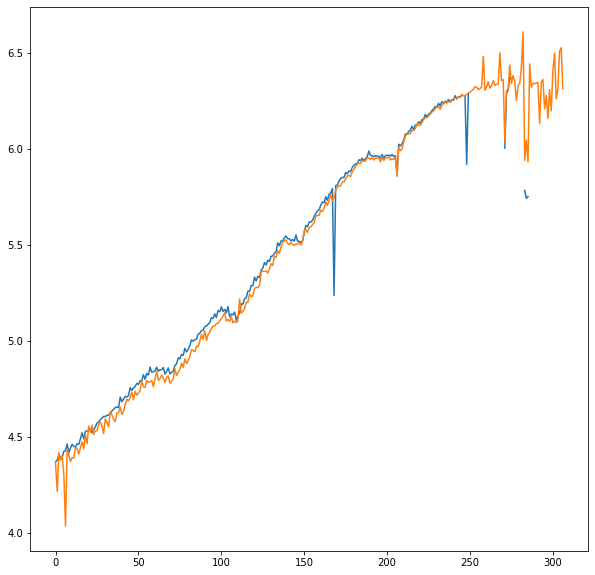

11


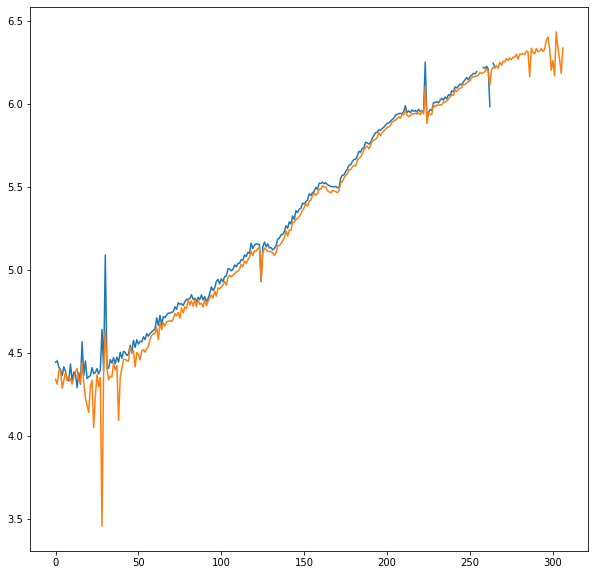

12


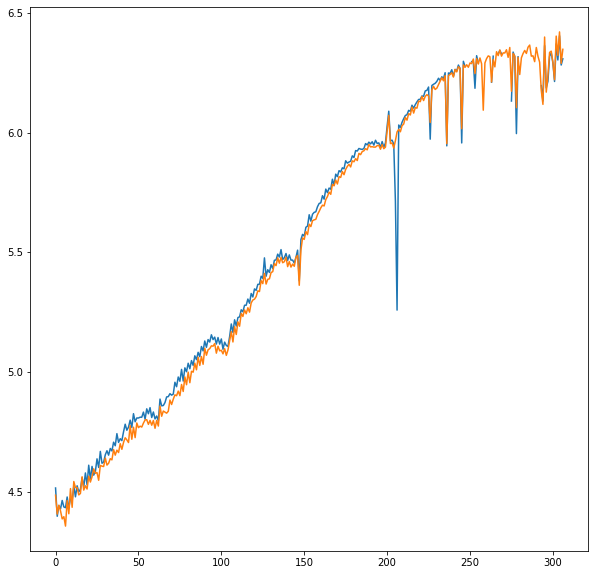

13


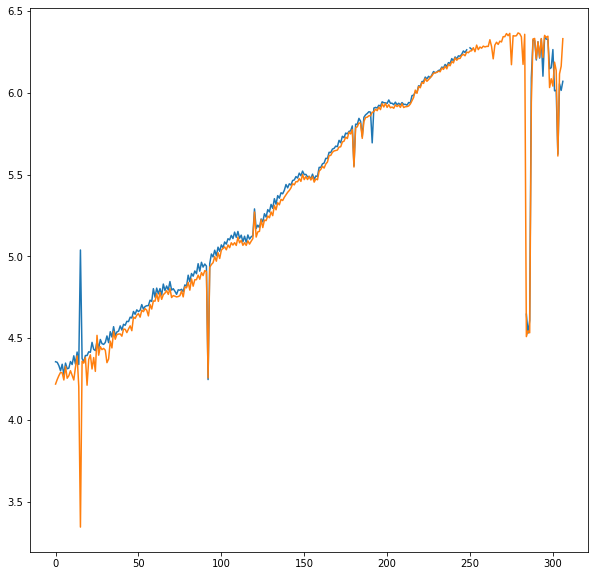

14


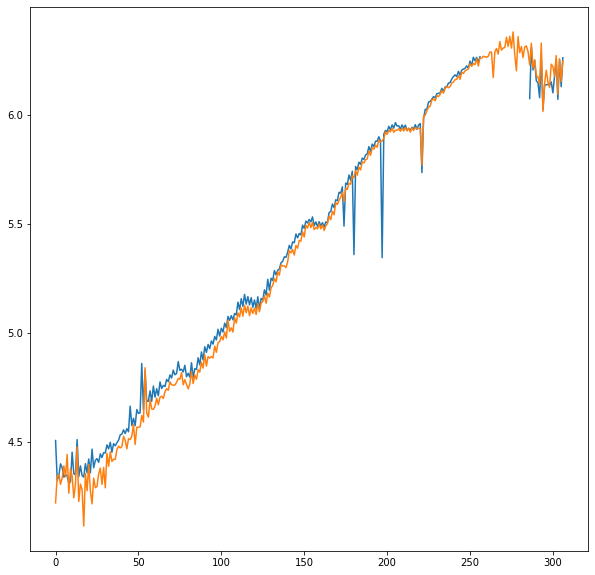

15


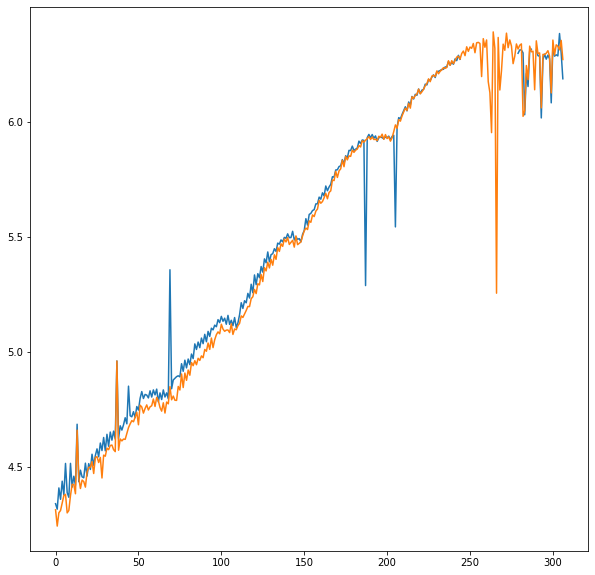

16


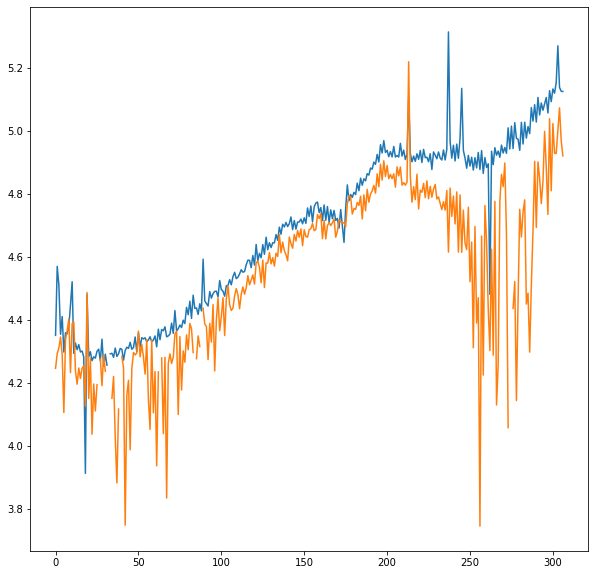

17


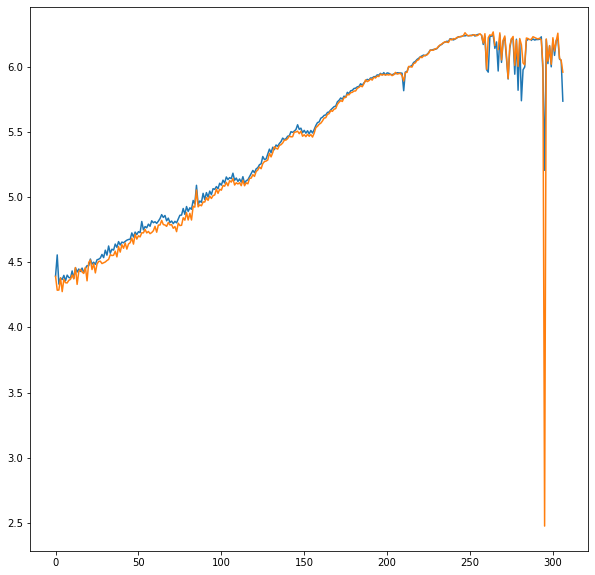

18


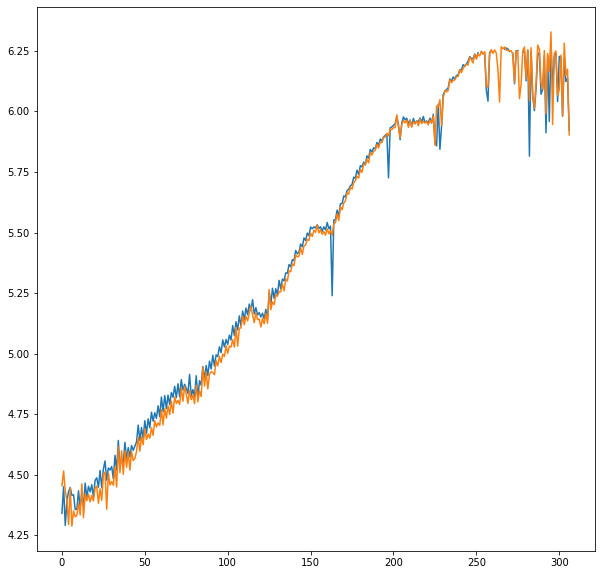

19


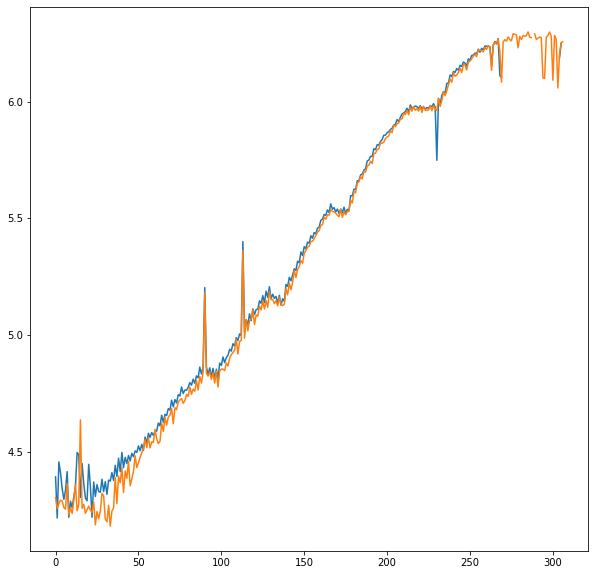

In [5]:
path = "/mnt/external.data/TowbinLab/spsalmon/shallow_chambers_analysis_testing/analysis/report/"

# file_sobel = glob.glob(path + "*" + "ch2_sobel_cleaned_str_molts.mat")[0]
file_sobel = glob.glob(path + "*" + "ch2_li_str_molts.mat")[0]
file_unet = glob.glob(path + "*" + "ch1_3_better_unet_str_molts.mat")[0]
# file_sobel = glob.glob(path + "*" + "ch2_sobel_cleaned_str_molts.mat")[0]
# file = p + "ch2_sobel_str_molts_nw_cor.mat"

mat_unet = scipy.io.loadmat(file_unet)

vol_unet = mat_unet['vol']
moults_unet = mat_unet['ecdys']

mat_sobel = scipy.io.loadmat(file_sobel)

vol_sobel = mat_sobel['vol']
moults_sobel = mat_sobel['ecdys']



counter = 0
for p, v_unet in enumerate(vol_unet):
    print(p)
    v_sobel = vol_sobel[p, :]
    log_v_unet = np.log10(v_unet)
    log_v_sobel = np.log10(v_sobel)

    plt.plot(log_v_sobel)
    plt.plot(log_v_unet)
    
    plt.show()
    # if not np.isnan(m).any():

    # v = medfilt(v, 11)
    # log_v = np.log10(v)

    # nans, x= nan_helper(log_v)
    # log_v[nans]= np.interp(x(nans), x(~nans), log_v[~nans])

    # # log_v = np.log10(v)

    # logdiff = np.diff(np.log10(log_v), 1)

    # smooth_logdiff = uniform_filter1d(uniform_filter1d(logdiff, 25), 10)

    # # smooth_logdiff = abs(uniform_filter1d(uniform_filter1d(logdiff, 25), 10))
    # # smooth_logdiff = abs(uniform_filter1d(logdiff, 25))

    # peaks, dict_peaks = find_peaks(-smooth_logdiff, prominence=5e-5)

    # # # print(peaks)
    # # print(log_v[peaks[-1]])
    # log_vol_at_peaks = log_v[peaks]
    # # print(log_vol_at_peaks)
    # # selected_peaks = np.empty(4)

    # plt.plot(log_v)
    # selected_peaks = []
    # for i in range(4):
    #     diff_to_set = abs(log_vol_at_peaks - log_size_range[i])
    #     # print(diff_to_set)
    #     possiblePeaks = peaks[np.argwhere(diff_to_set < np.log10(1.5))]
    #     for p in possiblePeaks:
    #         selected_peaks.append(p)

    # for peak in selected_peaks:
    #     plt.scatter(peak, log_v[peak])
    # plt.show()

    # print(selected_peaks)
    # print(m)